<h1 style="background-color:powderblue; text-align: center; font-family:verdana; font-size:250%;">
    Ford GoBike tripdata Exploration
</h1>
<h3 style="background-color:SeaShell;text-align: center;font-family:courier; font-size:150%;">
    Notebook by: <em>Ahmed Esmat</em>
</h3>

> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose ... [continue reading](https://www.crunchbase.com/organization/gobike)

## Table of Contents
- [Introduction to Dataset](#intro)
- [Part I - Preliminary Wrangling](#Wrangling)
- [Part II - Univariate Exploration](#Univariate)
- [Part III - Bivariate Exploration](#Bivariate)
- [Part IV - Multivariate Exploration](#Multivariate)

<a id='intro'></a>
## Introduction to Dataset
<img src="https://www.sanjoseinside.com/wp-content/uploads/2017/08/IMG_20170803_115233-772x350.jpg" width="525" style="float:right">

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area by Ford GoBike. You may refer to [this link](https://media.ford.com/content/fordmedia/fna/us/en/news/2017/06/27/ford-gobike-launching-in-bay-area-bike-sharing.html) for more bike-sharing service info.

> Are you ready for a trip to get some insights from this dataset?

<a id='Wrangling'></a>
## Part I - Preliminary Wrangling

To get started, let's import our libraries.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
#Load in the dataset and show the first rows.
ford_bike = pd.read_csv('fordgobike-tripdata.csv')
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# explore the dataset
# dataset shape
ford_bike.shape

(183412, 16)

In [4]:
# data info
ford_bike.info()

# start_time & end_time need to be converted from object to dateTime.
# Convert bike ID, start & end stations id to string.
# Some missing values needs repair / drop.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Convert start_time & end_time from string to datetime format.
ford_bike[['start_time', 'end_time']] = ford_bike[['start_time', 'end_time']].apply(pd.to_datetime)
ford_bike[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_time  183412 non-null  datetime64[ns]
 1   end_time    183412 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.8 MB


In [6]:
# Convert bike ID, start & end stations id to string.
ford_bike[['start_station_id', 'end_station_id','bike_id']] = ford_bike[['start_station_id', 'end_station_id','bike_id']].astype('object')
ford_bike[['start_station_id', 'end_station_id','bike_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   start_station_id  183215 non-null  object
 1   end_station_id    183215 non-null  object
 2   bike_id           183412 non-null  object
dtypes: object(3)
memory usage: 4.2+ MB


In [7]:
# Check for the null values
ford_bike.isnull().sum()

# There's a null values for some trips' station ID and station name in addition to member birth year and member gender.

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# check the null values for member birth year and gender in the same record.
(ford_bike['member_gender'].isnull() == ford_bike['member_birth_year'].isnull()).sum() == ford_bike.shape[0]

# True, The missing values are in same rows.

True

In [9]:
# Check the member gender missing values ratio to whole dataset
ford_bike['member_gender'].isnull().sum() / ford_bike.shape[0]

# As it is less than 5%, it is supposed to be dropped.

0.04506248228033062

In [10]:
# check the null values for start station id and start station name in the same record.
(ford_bike['start_station_id'].isnull() == ford_bike['start_station_name'].isnull()).sum() == ford_bike.shape[0]

# All values are true, The missing values are in same rows.

True

In [11]:
# check the null values for end station id and end station name in the same record.
(ford_bike['end_station_id'].isnull() == ford_bike['end_station_name'].isnull()).sum() == ford_bike.shape[0]

# True, The missing values are in same rows.

True

In [12]:
# check the null values for start station id and end station id in the same record.
(ford_bike['start_station_id'].isnull() == ford_bike['end_station_id'].isnull()).sum() == ford_bike.shape[0]

# True, The missing values are in same rows.

True

<h3>The Methodology for treating such missing values will be as follows:-</h3>

>- For station ID and names; a trial to recover missing values by refilling through the available stations info (the specified location coordinates for identified stations) instead of dropping it. If missing stations data can't be recovered, it will be dropped.<br>
>- For members' birth year and gender: The missing records will be dropped as it can't be recovered using the available data and it is less than 5% of the data (minor loss).

In [13]:
# create a new filtered dataset for unique station data in order to refill the missing stations data as possible.
# create a common columns header label.
columns = ['station_id','station_name','station_latitude','station_longitude']

# create a dataset for start stations.
ford_bike_start_stations = ford_bike[['start_station_id','start_station_name','start_station_latitude','start_station_longitude']]
ford_bike_start_stations.columns = columns

# create a dataset for end stations.
ford_bike_end_stations = ford_bike[['end_station_id','end_station_name','end_station_latitude','end_station_longitude']]
ford_bike_end_stations.columns = columns

# Combine and clean stations' data.
ford_bike_stations = ford_bike_start_stations.append(ford_bike_end_stations)
ford_bike_stations.drop_duplicates(inplace=True)
ford_bike_stations.dropna(inplace=True)
ford_bike_stations.head()

,station_id,station_name,station_latitude,station_longitude
0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811
1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034
2,86.0,Market St at Dolores St,37.769305,-122.426826
3,375.0,Grove St at Masonic Ave,37.774836,-122.446546
4,7.0,Frank H Ogawa Plaza,37.804562,-122.271738


In [14]:
# Check null values.
ford_bike_stations.isnull().sum()

# All null values are dropped

station_id           0
station_name         0
station_latitude     0
station_longitude    0
dtype: int64

In [15]:
# Check duplication.
ford_bike_stations.duplicated().sum()

# No duplicated values

0

In [16]:
# return the new dataframe shape.
ford_bike_stations.shape

# There is 329 healthy record for stations around the area.

(329, 4)

In [17]:
# Check missing station latitude values within filtered ford_bike_stations dataframe.
print(ford_bike[ford_bike['start_station_id'].isnull()]['start_station_latitude'].min(), ' & ',
ford_bike[ford_bike['start_station_id'].isnull()]['start_station_latitude'].max(), '\n',
ford_bike_stations['station_latitude'].min(), ' & ',
ford_bike_stations['station_latitude'].max())

# The values are within identified area limits.

37.38  &  37.42 
 37.3172979  &  37.88022244590679


In [18]:
# Check missing stations' latitude are matched with any value in filtered ford_bike_stations dataframe.

ford_bike[ford_bike['start_station_id'].isnull()]['start_station_latitude'].isin(ford_bike_stations['station_latitude']).sum()

# No compatible data were found !!

0

>- As There is no data can be recovered for missed stations ID and names, therefore the missed data will be dropped. It will not affect our analysis as it is only less than 1% of the data.

In [19]:
# Dropping the missed stations ID and names.
ford_bike.dropna(subset=['start_station_id'], inplace=True)
ford_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [20]:
# Dropping the members' gender and year of birth.
ford_bike.dropna(subset=['member_gender'], inplace=True)
ford_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

<h3> Constructing a new  features;</h3>

>1- Calculating the trip distance as a function of trip coordinates (Km).<br>
>2- Calculating the trip travelling speed (Km/hr). <br>
>3- Calculating the member age (years).

In [21]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Reference:" 'https://stackoverflow.com/questions/40452759/pandas-latitude-longitude-to-distance-between-successive-rows'

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [22]:
# convert the trip start / end coordinates into distance
ford_bike['dist'] = haversine(ford_bike['start_station_latitude'],ford_bike['start_station_longitude'],ford_bike['end_station_latitude'],ford_bike['end_station_longitude'])
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dist
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544709
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.704545
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260739
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.409301
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,3.332203


In [23]:
# calculate trip speed (Km/hr)
ford_bike['trip_speed'] = ford_bike['dist'] *60 *60 / ford_bike['duration_sec']
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dist,trip_speed
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544709,0.037577
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.704545,0.157409
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260739,0.025724
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.409301,5.472230
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,3.332203,6.690424


In [24]:
# Calculating the member age in years.
now = pd.Timestamp('now').year
ford_bike['age'] = now - ford_bike['member_birth_year']
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dist,trip_speed,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544709,0.037577,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.704545,0.157409,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260739,0.025724,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.409301,5.472230,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,3.332203,6.690424,62.0


In [25]:
# Showing the final dataset info.
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [26]:
# Showing the final dataset shape.
ford_bike.shape

(174952, 19)

In [27]:
# Check the date & time interval for the trip data.
ford_bike['start_time'].min(), ford_bike['start_time'].max()

(Timestamp('2019-02-01 00:00:20.636000'),
 Timestamp('2019-02-28 23:59:18.548000'))

In [28]:
# Check the date & time interval for the trip data.
ford_bike['end_time'].min(), ford_bike['end_time'].max()

(Timestamp('2019-02-01 00:04:52.058000'),
 Timestamp('2019-03-01 08:01:55.975000'))

<h4>N.B.: The investigation data covers 1-month of operation</h4>

In [29]:
# Inspect main data descriptive statistics for duration, member birth year, distance and trip speed.

ford_bike[['duration_sec','member_birth_year','dist','trip_speed','age']].describe()

,duration_sec,member_birth_year,dist,trip_speed,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,1984.803135,1.690049,10.840040,36.196865
std,1642.204905,10.118731,1.096957,3.913851,10.118731
min,61.000000,1878.000000,0.000000,0.000000,20.000000
25%,323.000000,1980.000000,0.910443,8.728103,29.000000
50%,510.000000,1987.000000,1.429829,11.074360,34.000000
75%,789.000000,1992.000000,2.224010,13.366717,41.000000
max,84548.000000,2001.000000,69.469241,36.009974,143.000000


### What is the structure of your dataset?

> The dataset consists of 174,952 record for 19 features. The features are in datetime, strings and numerical formates.

### What is/are the main feature(s) of interest in your dataset?

> Trip duration, Distance, Speed, Stations, date and member classification (age, gender and type).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip duration, Distance, Speed, Stations, date and member classification (age, gender and type).

<a id='Univariate'></a>
## Part II - Univariate Exploration

> In this section, Individual variables distributions investigation.

<h3>In This Section, a simple features will be investigated as follows:</h3>

> Q1. How the users are distributed between Customers and Subscribers?<br>
> Q2. Which Gender are more using our product?<br>
> Q3. What is the most common age using our product?

> Q4. Where are the most common start stations and End stations?<br>
> Q5. Also, Where are the less start stations and End stations?

> Q6. What is the mean trip duration?<br>
> Q7. What is the mean distance travel of trips?<br>
> Q8. What is the average trip speed?


<h3 style="background-color:Azure; text-align:left; font-family:verdana; font-size:125%;">
    Q1 ~ Q3. Exploring User Type, Age and Gender
</h3>

In [30]:
base_color = sb.color_palette()[9]

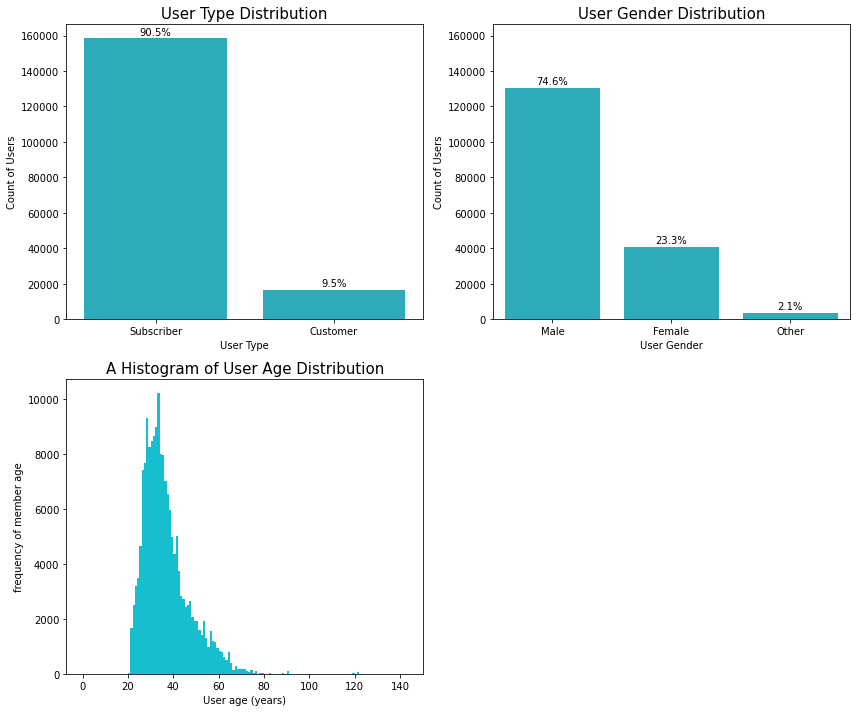

In [31]:
# Ploting the distribution of member gender & type
# Resize figure to accommodate Three plots
plt.figure(figsize = [12, 10],tight_layout=True)

# PLOT ON LEFT - SIMPLE count plot for user type
plt.subplot(2, 2, 1)
user_order = ford_bike['user_type'].value_counts()     # get the order of more frequent user type
ax1=sb.countplot(data=ford_bike,x='user_type',color=base_color, order=user_order.index);   # Plot user types
plt.title('User Type Distribution', fontsize=15);
plt.xlabel('User Type');
plt.ylabel('Count of Users');
locs_u, labels_u = plt.xticks()    # get the current tick locations and labels
for loc_u, label_u in zip(locs_u, labels_u):     # loop through each pair of locations and labels
    count_u = user_order[label_u.get_text()]     # get the text property for the label to get the correct count
    pct_string = '{:0.1f}%'.format(100*count_u/user_order.sum())
    plt.text(loc_u, count_u+2000, pct_string, ha = 'center', color = 'black')     # print the annotation just above the top of the bar

# PLOT ON middle - SIMPLE count plot for member gender
plt.subplot(2, 2, 2)
gender_order = ford_bike['member_gender'].value_counts()     # get the order of more frequent members gender
sb.countplot(data=ford_bike,x='member_gender',color=base_color, order=gender_order.index);   # Plot member gender
plt.title('User Gender Distribution', fontsize=15);
plt.xlabel('User Gender');
plt.ylabel('Count of Users');
plt.ylim(ax1.get_ylim())
locs_g, labels_g = plt.xticks()    # get the current tick locations and labels
for loc_g, label_g in zip(locs_g, labels_g):     # loop through each pair of locations and labels
    count_g = gender_order[label_g.get_text()]     # get the text property for the label to get the correct count
    pct_string = '{:0.1f}%'.format(100*count_g/gender_order.sum())
    plt.text(loc_g, count_g+2000, pct_string, ha = 'center', color = 'black')     # print the annotation just above the top of the bar

# PLOT ON right - SIMPLE histogram for member age
plt.subplot(2, 2, 3)
bins_ag = np.arange(0, ford_bike['age'].max()+1, 1)   # Get the bins between [0-max age], at an interval of one year.
plt.hist(data=ford_bike, x='age', bins=bins_ag, color=base_color);   # Plot the histogram for the member age
plt.title('A Histogram of User Age Distribution', fontsize=15);
plt.xlabel('User age (years)');
plt.ylabel('frequency of member age');

> - More Than 90% of our travellers are using subscribtion services.
> - About 75% of bike rider members are males.
> - About 2% of bike riders prefer not to tell about gender.
> - It is clearly showen in the age distribution that the minimun age of travellers are 20 years, This may support a regulation set for bike riders or a data cut setting 20 years old as a threshold.
> - Outliers are obviuosly showen in the age distribution, this may reflect an incorrect data entry.

> - A box plot will show the descriptive statistics and outliers, the outliers will be excluded from the plot through axis limits and a histogram will be plotted again.

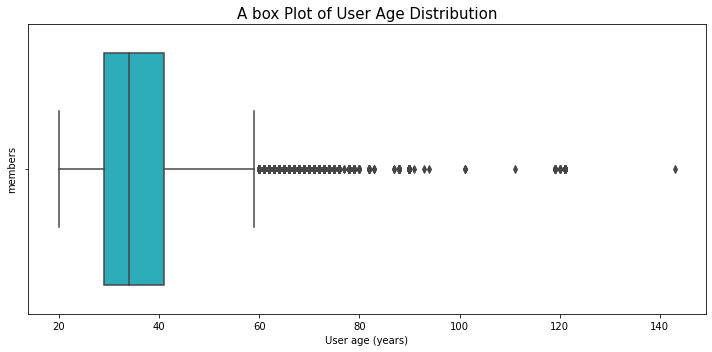

In [32]:
# A Box PLOT for members' age
plt.figure(figsize = [10, 5],tight_layout=True)     # Resize figure to accommodate Three plots
sb.boxplot(data=ford_bike, x='age', color = base_color);      # Construct a boxplot for members age
plt.xlabel('User age (years)');
plt.ylabel('members');
plt.title('A box Plot of User Age Distribution',fontsize=15);

> - Data for more than 80 years will be dropped.
> - Box Plot suggets that outliers are falling beyond 60 years old members.
> - Re-plotting the histogram for age after limiting the age to 80 years old.

In [33]:
# Dropping member age of 80 years old and more, this may reflect wrong data entry or system bugs.
ford_bike = ford_bike.drop(ford_bike[ford_bike.age >= 80].index)
ford_bike.shape[0]

174740

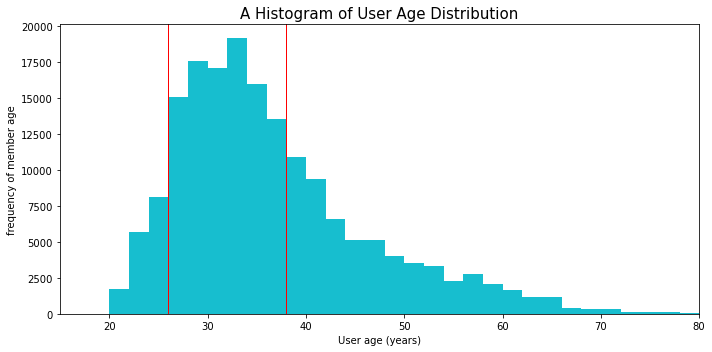

In [34]:
# PLOT the histogram for member age
plt.figure(figsize = [10, 5],tight_layout=True)                       # Resize figure to accommodate Three plots
bins_age = np.arange(0, ford_bike['age'].max()+2, 2)                  # Get the bins between [0-max age], at an interval of Two year.
plt.hist(data=ford_bike, x='age', bins=bins_age, color=base_color);   # Plot the histogram for the member age
plt.xlim([15,80]);
plt.axvline(x=26, color='r',linewidth=1);                             # Draw a red line for a selected range.
plt.axvline(x=38, color='r',linewidth=1);                             # Draw a red line for a selected range.
plt.title('A Histogram of User Age Distribution',fontsize=15);
plt.xlabel('User age (years)');
plt.ylabel('frequency of member age');

> - The most frequent members age is between 27 ~ 37 Years old.

<h3 style="background-color:Azure; text-align:left; font-family:verdana; font-size:125%;">
    Q4 ~ Q5. Exploring Travelling Stations
</h3>

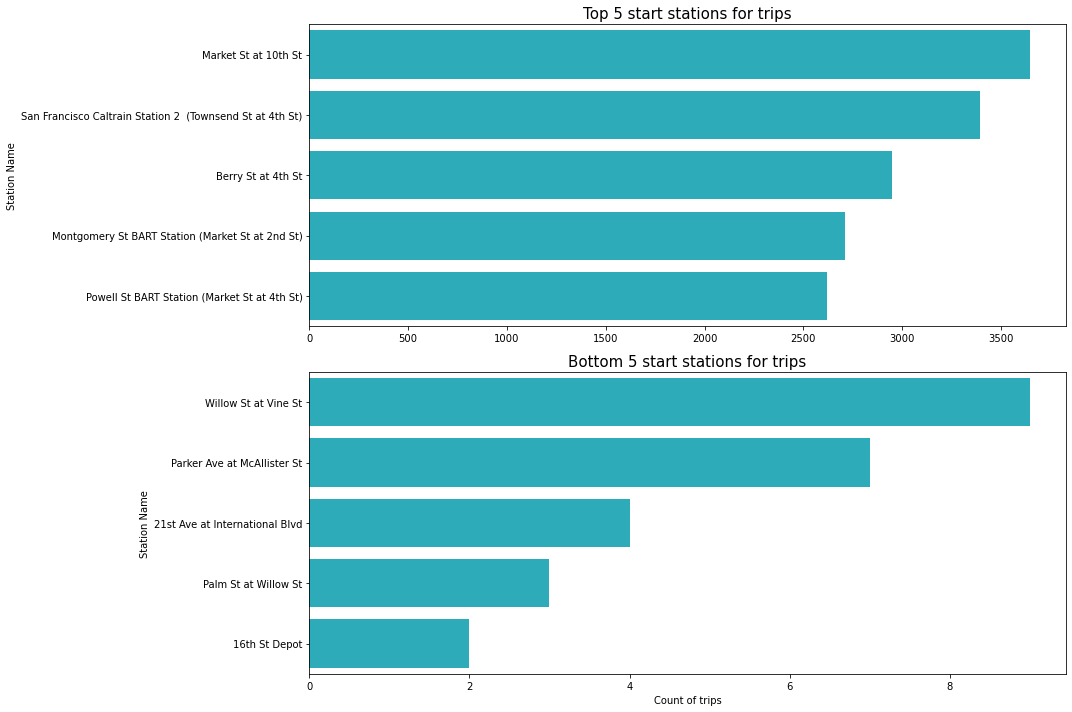

In [35]:
# Ploting the distribution of top 5 stations that customers are travelling from / to.
# Resize figure to accommodate the two plots
plt.figure(figsize = [15,10],tight_layout=True)

# PLOT ON TOP LEFT - Count plot for top 5 start stations
plt.subplot(2, 1, 1)
Start_station_order = ford_bike['start_station_name'].value_counts()[0:5]     # get the order of more frequent user type
sb.countplot(data=ford_bike,y='start_station_name',color=base_color, order=Start_station_order.index);   # Plot user types
plt.title('Top 5 start stations for trips',fontsize=15);
plt.ylabel('Station Name');
plt.xlabel('');

# PLOT ON TOP Right - Count plot for bottom 5 start stations
plt.subplot(2, 1, 2)
Start_station_order_r = ford_bike['start_station_name'].value_counts()[-5:]     # get the reversed order of more frequent user type
sb.countplot(data=ford_bike,y='start_station_name',color=base_color, order=Start_station_order_r.index);   # Plot user types
plt.title('Bottom 5 start stations for trips',fontsize=15);
plt.ylabel('Station Name');
plt.xlabel('Count of trips');

<h4> The Travellers' high frequent trips start stations are:- </h4>

> - Market St at 10th St, 
> - San Francisco Caltrain Station 2  (Townsend St at 4th St), 
> - Berry St at 4th St,
> - Montgomery St BART Station (Market St at 2nd St),
> - Powell St BART Station (Market St at 4th St)).

<h4> The Travellers' lowest frequent trips start stations are:- </h4>

> - Willow St at Vine St, 
> - Parker Ave at McAllister St, 
> - 21st Ave at International Blvd,
> - Palm St at Willow St,
> - 16th St Depot.

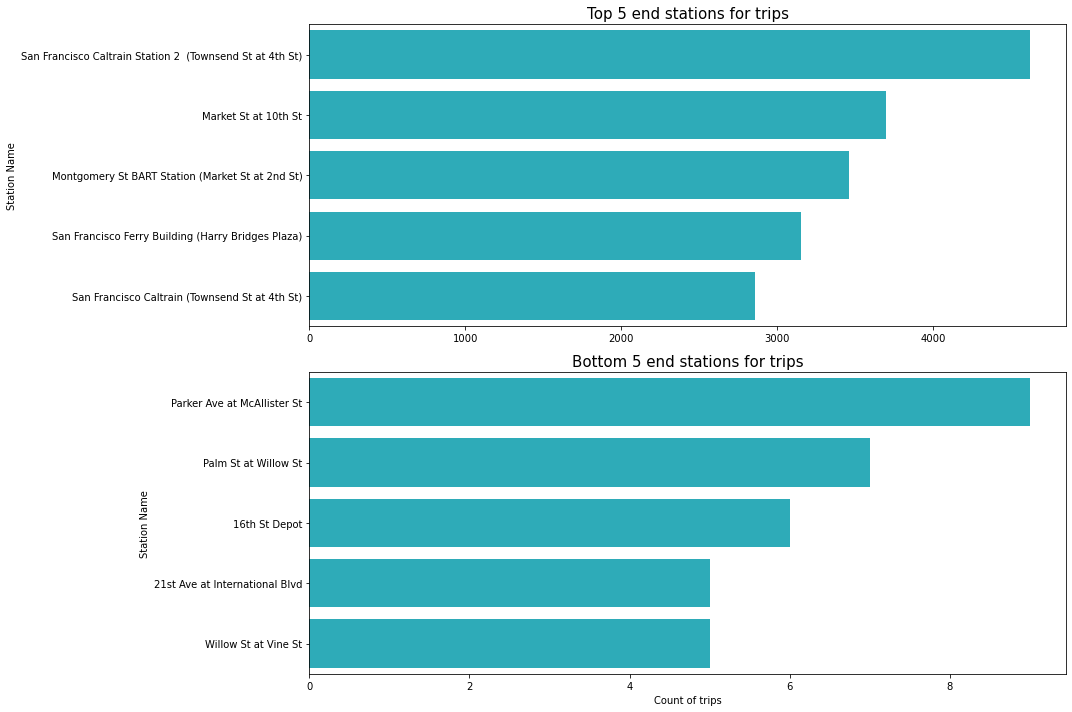

In [36]:
# Ploting the distribution of bottom 5 stations that customers are travelling from / to.
# Resize figure to accommodate the two plots
plt.figure(figsize = [15,10],tight_layout=True)
# PLOT ON BOTTOM LEFT - Count plot for top 5 end stations
plt.subplot(2, 1, 1)
end_station_order = ford_bike['end_station_name'].value_counts()[0:5]     # get the order of more frequent user type
sb.countplot(data=ford_bike,y='end_station_name',color=base_color, order=end_station_order.index);   # Plot user types
plt.title('Top 5 end stations for trips',fontsize=15);
plt.ylabel('Station Name');
plt.xlabel('');

# PLOT ON BOTTOM Right - Count plot for bottom 5 end stations
plt.subplot(2, 1, 2)
end_station_order_r = ford_bike['end_station_name'].value_counts()[-5:]     # get the reversed order of more frequent user type
sb.countplot(data=ford_bike,y='end_station_name',color=base_color, order=end_station_order_r.index);   # Plot user types
plt.title('Bottom 5 end stations for trips',fontsize=15);
plt.ylabel('Station Name');
plt.xlabel('Count of trips');

<h4> The Travellers' high frequent trips end stations are:- </h4>

> - San Francisco Caltrain Station 2  (Townsend St at 4th St), 
> - Market St at 10th St, 
> - Berry St at 4th St,
> - Montgomery St BART Station (Market St at 2nd St),
> - San Francisco Caltrain (Townsend St at 4th St).

<h4> The Travellers' lowest frequent trips end stations are:- </h4>

> - Parker Ave at McAllister St, 
> - Palm St at Willow St, 
> - 16th St Depot,
> - Willow St at Vine St,
> - 21st Ave at International Blvd.

> * It is noted that "San Francisco Caltrain Station 2 (Townsend St at 4th St)", "Market St at 10th St" and "Montgomery St BART Station (Market St at 2nd St)" are most crowded (Down town area, travel stations, Markets area) as they have the highest frequency for start / end stations of bike users.

> * On the opposite, "Parker Ave at McAllister St", "Palm St at Willow St", "16th St Depot", "Willow St at Vine St", "21st Ave at International Blvd" are common in lowest frequency for start / end stations of bike users, this may reflect outskirts of the city or a luxury life (that depends on own cars).

<h3 style="background-color:Azure; text-align:left; font-family:verdana; font-size:125%;">
    Q6 ~ Q8. Exploring Trips' Duration, Distance and Speed
</h3>

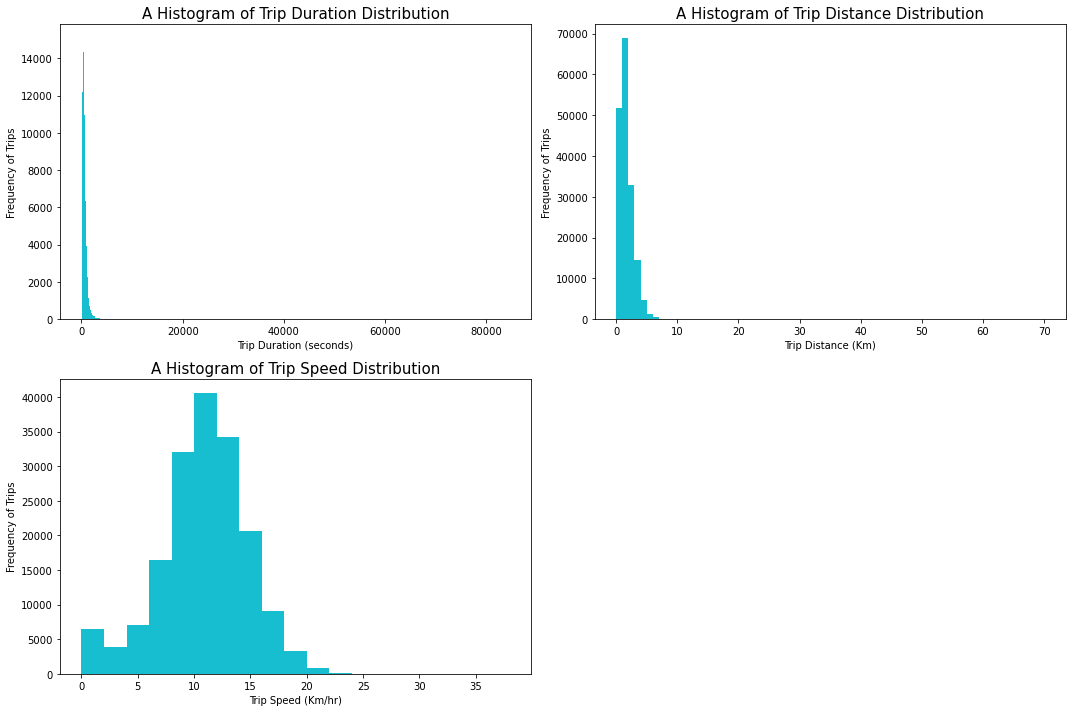

In [37]:
# Ploting the distribution of trip duration, distance and speed
# Resize figure to accommodate Three plots
plt.figure(figsize = [15, 10],tight_layout=True)

# PLOT ON LEFT - SIMPLE Histogram for trip duration
plt.subplot(2, 2, 1)
bins_dur = np.arange(0, ford_bike['duration_sec'].max()+60, 60)                  # Get the bins between [0-max age], at an interval of 1 min.
plt.hist(data=ford_bike, x='duration_sec', bins=bins_dur, color=base_color);   # Plot the histogram for the member age
plt.title('A Histogram of Trip Duration Distribution',fontsize=15);
plt.xlabel('Trip Duration (seconds)');
plt.ylabel('Frequency of Trips');

# PLOT ON middle - SIMPLE Histogram for Trip distance
plt.subplot(2, 2, 2)
bins_dis = np.arange(0, ford_bike['dist'].max()+1, 1)                  # Get the bins between [0-max age], at an interval of 1 Km.
plt.hist(data=ford_bike, x='dist', bins=bins_dis, color=base_color);          # Plot the histogram for the member age
plt.title('A Histogram of Trip Distance Distribution',fontsize=15);
plt.xlabel('Trip Distance (Km)');
plt.ylabel('Frequency of Trips');

# PLOT ON right - SIMPLE histogram for Trip Speed
plt.subplot(2, 2, 3)
bins_spd = np.arange(0, ford_bike['trip_speed'].max()+2, 2)                  # Get the bins between [0-max age], at an interval of 2 Km/hr.
plt.hist(data=ford_bike, x='trip_speed', bins=bins_spd, color=base_color);   # Plot the histogram for the member age
plt.title('A Histogram of Trip Speed Distribution',fontsize=15);
plt.xlabel('Trip Speed (Km/hr)');
plt.ylabel('Frequency of Trips');

> - Outliers are obviuosly showen in the trip duration, trip distance and trip speed distribution.
> - A box plot will show the descriptive statistics and outliers, the outliers will be excluded from the plot through axis limits and a histogram will be plotted again.

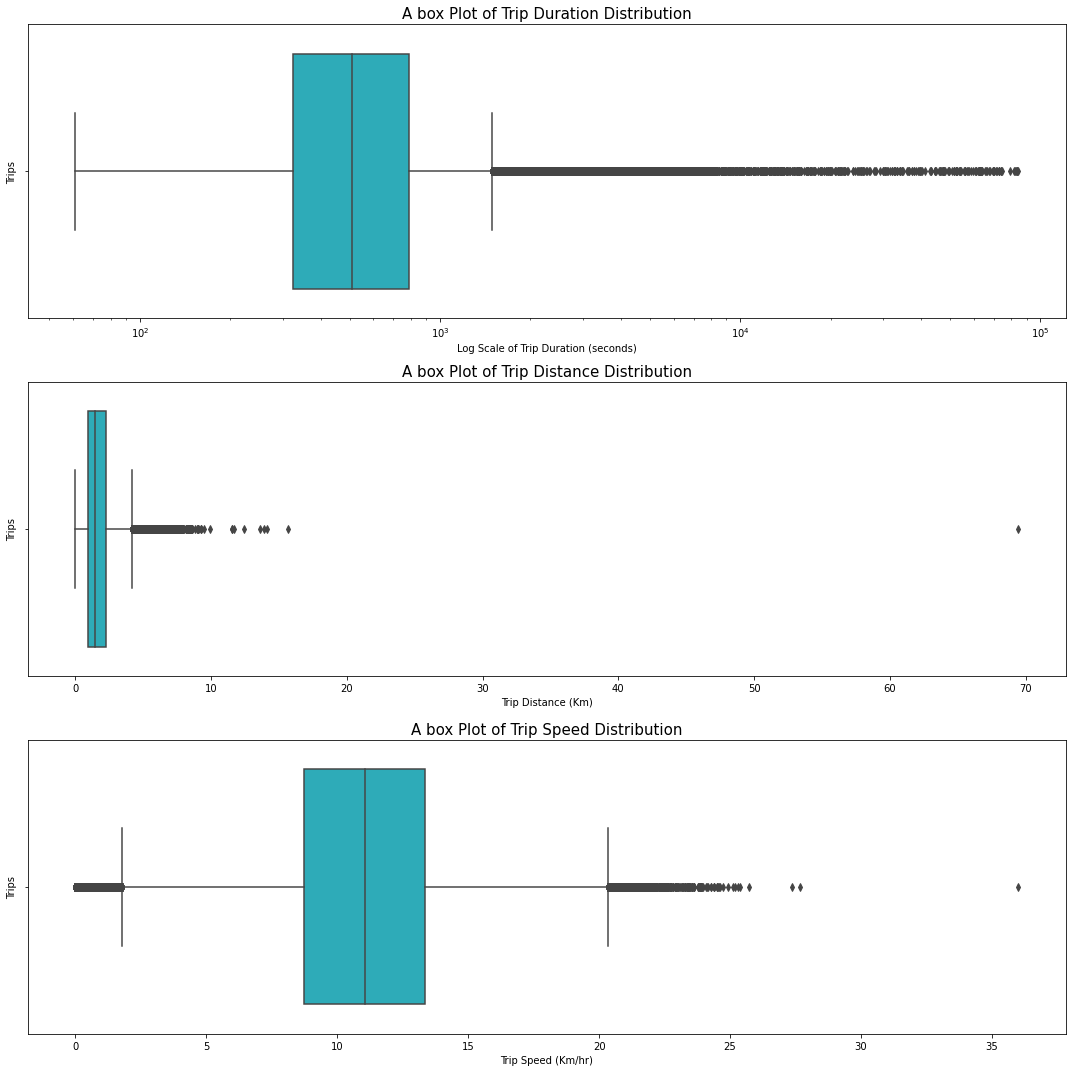

In [38]:
# Ploting the distribution of trip duration, distance and speed using Box Plot
# Resize figure to accommodate Three plots
plt.figure(figsize = [15, 15],tight_layout=True)                       # Resize figure to accommodate Three plots

# PLOT ON LEFT - A Box PLOT for trip duration
plt.subplot(3, 1, 1)
sb.boxplot(data=ford_bike, x='duration_sec', color = base_color);      # Construct a boxplot for members age
plt.xlabel('Log Scale of Trip Duration (seconds)');
plt.ylabel('Trips');
plt.xscale('log');
plt.title('A box Plot of Trip Duration Distribution',fontsize=15);

# PLOT ON Middle - A Box PLOT for trip Distance
plt.subplot(3, 1, 2)
sb.boxplot(data=ford_bike, x='dist', color = base_color);              # Construct a boxplot for members age
plt.xlabel('Trip Distance (Km)');
plt.ylabel('Trips');
plt.title('A box Plot of Trip Distance Distribution',fontsize=15);

# PLOT ON Right - A Box PLOT for trip Speed
plt.subplot(3, 1, 3)
sb.boxplot(data=ford_bike, x='trip_speed', color = base_color);       # Construct a boxplot for members age
plt.xlabel('Trip Speed (Km/hr)');
plt.ylabel('Trips');
plt.title('A box Plot of Trip Speed Distribution',fontsize=15);

In [39]:
# Recall trip duration, distance and speed descriptive data statistics.

ford_bike[['duration_sec','dist','trip_speed']].describe()

,duration_sec,dist,trip_speed
count,174740.000000,174740.000000,174740.000000
mean,704.248243,1.690506,10.840058
std,1643.054877,1.096678,3.913848
min,61.000000,0.000000,0.000000
25%,323.000000,0.910955,8.728995
50%,511.000000,1.429829,11.074482
75%,789.000000,2.224610,13.367150
max,84548.000000,69.469241,36.009974


In [40]:
ford_bike[ford_bike['dist'] == 0].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dist,trip_speed,age
19,874,2019-02-28 23:43:05.183,2019-02-28 23:57:39.796,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,5629,Customer,1978.0,Male,No,0.0,0.0,43.0
27,408,2019-02-28 23:48:08.282,2019-02-28 23:54:56.930,78.0,Folsom St at 9th St,37.773717,-122.411647,78.0,Folsom St at 9th St,37.773717,-122.411647,5410,Subscriber,1982.0,Male,No,0.0,0.0,39.0
34,471,2019-02-28 23:42:43.361,2019-02-28 23:50:34.446,133.0,Valencia St at 22nd St,37.755213,-122.420975,133.0,Valencia St at 22nd St,37.755213,-122.420975,5559,Subscriber,1992.0,Male,No,0.0,0.0,29.0
55,3478,2019-02-28 22:39:35.020,2019-02-28 23:37:33.342,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,1846,Subscriber,1995.0,Male,No,0.0,0.0,26.0
56,3140,2019-02-28 22:44:53.503,2019-02-28 23:37:14.090,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,3040,Subscriber,1983.0,Female,No,0.0,0.0,38.0


In [41]:
ford_bike[ford_bike['dist'] == 0].shape[0]

3453

In [42]:
ford_bike.query('dist == 0 and duration_sec < 300').shape[0]

892

In [43]:
ford_bike.query('dist == 0 and duration_sec > 1200').shape[0]

1498

In [44]:
ford_bike[ford_bike['dist'] > 10]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dist,trip_speed,age
19827,2229,2019-02-26 15:11:44.523,2019-02-26 15:48:54.373,227.0,Foothill Blvd at Fruitvale Ave,37.783757,-122.222603,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2080,Subscriber,1989.0,Male,Yes,15.673955,25.314598,32.0
50859,3225,2019-02-21 17:51:18.986,2019-02-21 18:45:04.085,167.0,College Ave at Harwood Ave,37.848152,-122.252160,22.0,Howard St at Beale St,37.789756,-122.394643,4567,Subscriber,1988.0,Other,Yes,14.099709,15.739210,33.0
85529,8957,2019-02-17 12:38:50.477,2019-02-17 15:08:08.352,163.0,Lake Merritt BART Station,37.797320,-122.265320,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,4874,Subscriber,1975.0,Male,Yes,11.707442,4.705458,46.0
87602,4378,2019-02-17 00:27:13.613,2019-02-17 01:40:11.883,9.0,Broadway at Battery St,37.798572,-122.400869,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,1975,Customer,1993.0,Male,No,13.590843,11.175659,28.0
89787,1800,2019-02-16 14:15:06.336,2019-02-16 14:45:06.488,201.0,10th St at Fallon St,37.797673,-122.262997,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6396,Subscriber,1975.0,Male,Yes,11.531223,23.062447,46.0
112038,6945,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,300.0,Palm St at Willow St,37.317298,-121.884995,4780,Subscriber,1985.0,Female,No,69.469241,36.009974,36.0
121514,1792,2019-02-11 14:39:16.299,2019-02-11 15:09:09.130,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,223.0,16th St Mission BART Station 2,37.764765,-122.420091,855,Subscriber,1988.0,Male,No,12.409551,24.929902,33.0
153112,2216,2019-02-06 13:05:00.691,2019-02-06 13:41:57.678,219.0,Marston Campbell Park,37.809824,-122.280192,134.0,Valencia St at 24th St,37.752428,-122.420628,3027,Subscriber,1989.0,Female,Yes,13.894462,22.572231,32.0
161775,2357,2019-02-05 13:14:18.246,2019-02-05 13:53:35.665,201.0,10th St at Fallon St,37.797673,-122.262997,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,4530,Subscriber,1975.0,Male,Yes,11.531223,17.612391,46.0


In [45]:
ford_bike[ford_bike['dist'] > 10].shape

(9, 19)

In [46]:
ford_bike.query('dist > 10 and duration_sec < 2400').shape[0]

5

> - There is 3453 recorded trips with "Zero" distance (i.e. The bike was start and end the trip at the same station).
> - 892 trips out of those 3458 are last for less than 5 min, this is highly supporting a hypothesis of a trouble with the bike or unexperienced / new member.
> - 1498 trips out of those 3458 consumed more than 20 mins, this may represent somebody has a small journey with friends or delivering a request to another.
> - This caused apparent "Zero" speed calculations but actually has a reasonable special condition.
> - Lower calculated speed may reflect traffic issues, long idle time for something purchasing, old members, unexperienced members or bike issues during travelling.
> - There is only 9 trips with distance more than 10 Km. 5 of them has a high speed with duration less than 40 mins.
> - High trip speed -over 26 Km/hr-are rare and may occured by experienced cyclist.


<h4> Outliers will be excluded from the axis limit in order to focuse on main data parameters as follows:-</h4>

> - Duration less than 30 sec and more than 10000 sec.
> - Distance above 10 Km.
> - Speed over 26 Km/hr.

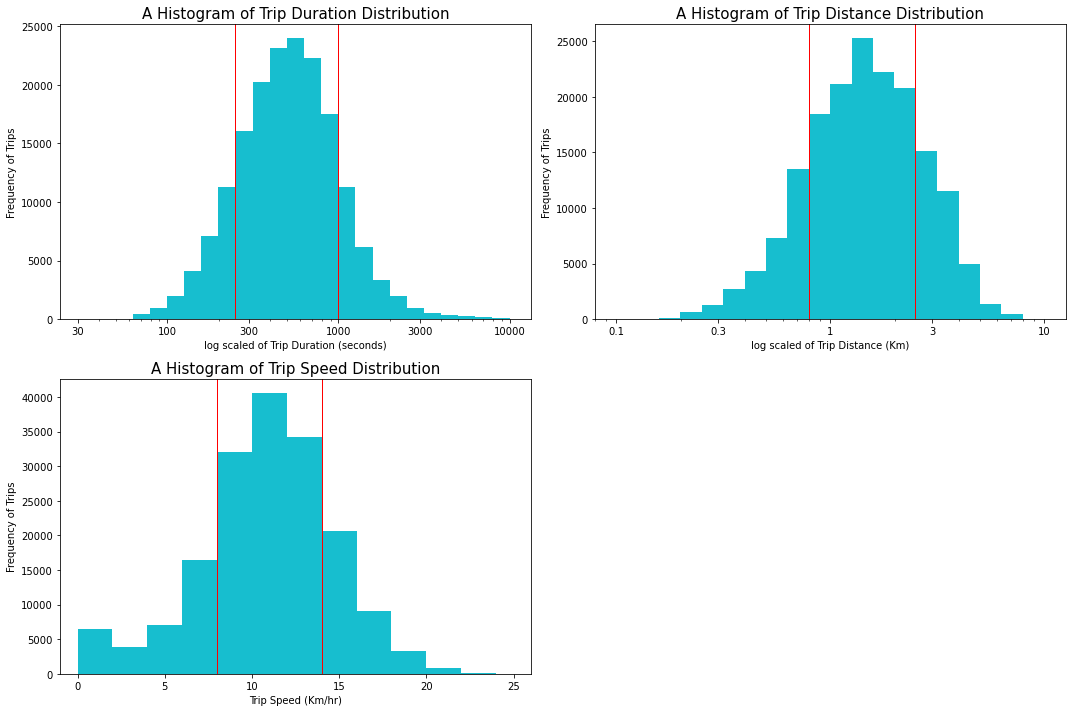

In [47]:
# Ploting the distribution of trip duration, distance and speed
# Resize figure to accommodate Three plots
plt.figure(figsize = [15, 10],tight_layout=True)

# PLOT ON LEFT - SIMPLE Histogram for trip duration
plt.subplot(2, 2, 1)
bins_dur =10 ** np.arange(1.5,4+0.1,0.1)                                         #Get the bins preparations for log scale.
ticks = [30, 100, 300, 1000, 3000, 10000]                   # Generate the x-ticks you want to apply
labels = ['{}'.format(v) for v in ticks]                                       # Convert ticks into string values, to be displayed along the x-axis
plt.xscale('log');
plt.xticks(ticks, labels);
plt.hist(data=ford_bike, x='duration_sec', bins=bins_dur, color=base_color);   # Plot the histogram for the member age
plt.axvline(x=250, color='r',linewidth=1);                                     # Draw a red line for a selected range.
plt.axvline(x=1000, color='r',linewidth=1);
plt.title('A Histogram of Trip Duration Distribution',fontsize=15);
plt.xlabel('log scaled of Trip Duration (seconds)');
plt.ylabel('Frequency of Trips');

# PLOT ON middle - SIMPLE Histogram for Trip distance
plt.subplot(2, 2, 2)
bins_dis =10 ** np.arange(-1,1+0.1,0.1)                                        # Get the bins preparations for log scale.
ticks = [0.1, 0.3, 1, 3, 10]                                                   # Generate the x-ticks you want to apply
labels = ['{}'.format(v) for v in ticks]                                       # Convert ticks into string values, to be displayed along the x-axis
plt.xscale('log'); 
plt.xticks(ticks, labels);
plt.hist(data=ford_bike, x='dist', bins=bins_dis, color=base_color);           # Plot the histogram for the member age
plt.axvline(x=0.8, color='r',linewidth=1);                                     # Draw a red line for a selected range.
plt.axvline(x=2.5, color='r',linewidth=1);                                     # Draw a red line for a selected range.
plt.title('A Histogram of Trip Distance Distribution',fontsize=15);
plt.xlabel('log scaled of Trip Distance (Km)');
plt.ylabel('Frequency of Trips');

# PLOT ON right - SIMPLE histogram for Trip Speed
plt.subplot(2, 2, 3)
bins_spd = np.arange(0, ford_bike['trip_speed'].max()+2, 2)                   # Get the bins between [0-max age], at an interval of 2 Km/hr.
plt.hist(data=ford_bike, x='trip_speed', bins=bins_spd, color=base_color);    # Plot the histogram for the member age
plt.axvline(x=8, color='r',linewidth=1);                                      # Draw a red line for a selected range.
plt.axvline(x=14, color='r',linewidth=1);                                     # Draw a red line for a selected range.
plt.xlim([-1,26])
plt.title('A Histogram of Trip Speed Distribution',fontsize=15);
plt.xlabel('Trip Speed (Km/hr)');
plt.ylabel('Frequency of Trips');

> - The majority of trips lasts for (250 ~ 1000 secs), while the majority of trips moves in a distance between (0.8 ~ 2.5 Km) and the average travelling speed varies between (8 ~ 14 Km/hr).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> A log X-axis scale was utilized during trip duration, distance investigation. A limited axis scale was utilized to emphasize on main data parameters for member age, trip duration, trip distance and tavelling speed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - At first, data type were converted for start / end time from object to datetime format. Bike ID, start / end stations ID were converted from integer to string. The stations missing values were dropped after a trial to recover the data through the available stations coordinates (latitude, longitude). The gender age and user type missing values were dropped as they can not be recovered by any of the availabe data besides they represents less than 5% of data.<br>
> - Utilizing the stations' coordinates, the distance between start and End stations were calculated and therefore the travelling speed of the trip. Also, the age was calculating from birth year<br>
> - During exploring the data, odd age values (more than 80 years old) were dropped.

<a id='Bivariate'></a>
## Part III - Bivariate Exploration

> In this section, relationships between pairs of variables in data will be investigated.

<h3>In This Section, a pair of features will be investigated as follows:</h3>

> Q1. How are the features related to each other (heatmap of correlations)?<br>
> Q2. Who is our Customers? What is their distribution?<br>
> Q3. What is the age group for each gender and user type?<br>
> Q4. Does Member Age affects Trip distance, Trip Speed or trip duration?<br>
> Q5. What are The most frequent days of the month with respect to user type?

<h3 style="background-color:LemonChiffon; text-align:left; font-family:verdana; font-size:125%;">
    Q1. Heat Map for features correlation between features
</h3>

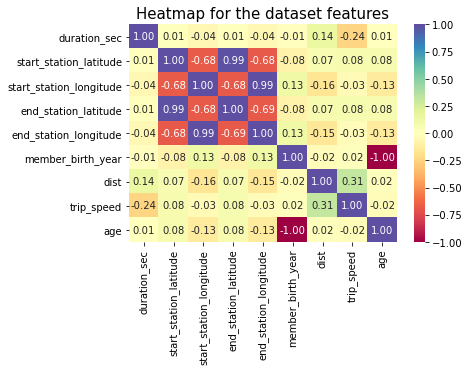

In [48]:
# Plot a heatmap for numerical dataset features to explore any possible relationships.

sb.heatmap(ford_bike.corr(), annot = True, fmt = '.2f', cmap = 'Spectral', center = 0);
plt.title('Heatmap for the dataset features', fontsize=15);

> - The data showing No Strong relation between features except for stations coordinates as the investigations run in one city, so the stations are close to each others.

<h3 style="background-color:LemonChiffon; text-align:left; font-family:verdana; font-size:125%;">
    Q2. Who is our Customers? What is their distribution?
</h3>

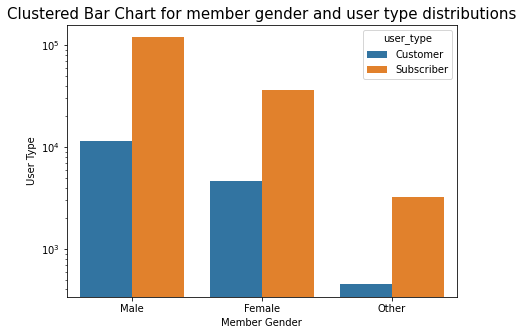

In [49]:
# Resize figure to accommodate Three plots
plt.figure(figsize = [7, 5])

#filter_list = ['Male', 'Female']                                                     # filter list to select male & female genders only.
#ford_bike_subset = ford_bike[ford_bike.member_gender.isin(filter_list)]
sb.countplot(data = ford_bike, x = 'member_gender', hue = 'user_type', order=['Male','Female','Other']);
plt.title('Clustered Bar Chart for member gender and user type distributions', fontsize=15);
plt.yscale('log')
plt.xlabel('Member Gender');
plt.ylabel('User Type');

> - Males are the main service customers.

<h3 style="background-color:LemonChiffon; text-align:left; font-family:verdana; font-size:125%;">
    Q3. What is the age distribution for each gender and user type?
</h3>

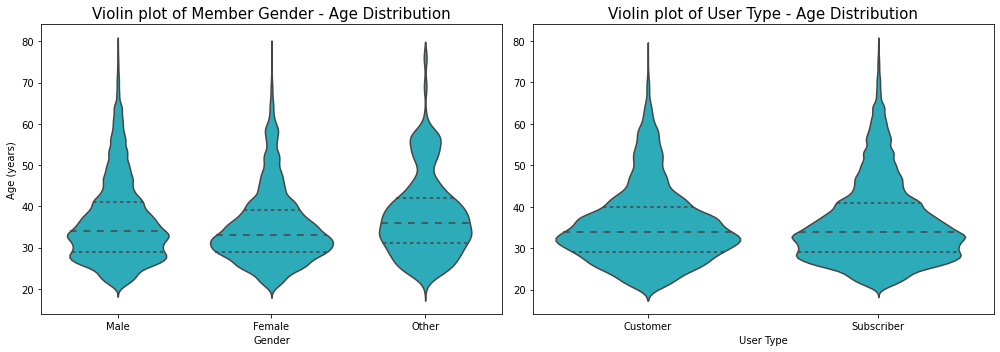

In [50]:
# Ploting the age distribution of gender and user type
# Resize figure to accommodate Two plots
plt.figure(figsize = [14, 5],tight_layout=True)

# PLOT ON LEFT - violin plot for gender - age distribution
plt.subplot(1, 2, 1)
sb.violinplot(data=ford_bike, x='member_gender', y='age', color = base_color, inner = 'quartile', order=['Male','Female','Other']); # Plot a violin for the member age & gender
plt.title('Violin plot of Member Gender - Age Distribution', fontsize=15);
plt.xlabel('Gender');
plt.ylabel('Age (years)');

# PLOT ON Right - violin plot for customer type - age distribution
plt.subplot(1, 2, 2)
sb.violinplot(data=ford_bike, x='user_type', y='age', color = base_color, inner = 'quartile'); # Plot a violin for the member age & gender
plt.title('Violin plot of User Type - Age Distribution', fontsize=15);
plt.xlabel('User Type');
plt.ylabel('');

> - Females showing relatively lower average age in compare with Males and other.
> - Other (or "unknown gender") showing a peak at ages between 50 and 60 years.
> - Customers and Subscribers almost showing the same age distributions.

<h3 style="background-color:LemonChiffon; text-align:left; font-family:verdana; font-size:125%;">
    Q4. Does Member Age affects Trip distance, Trip Speed or trip duration?
</h3>

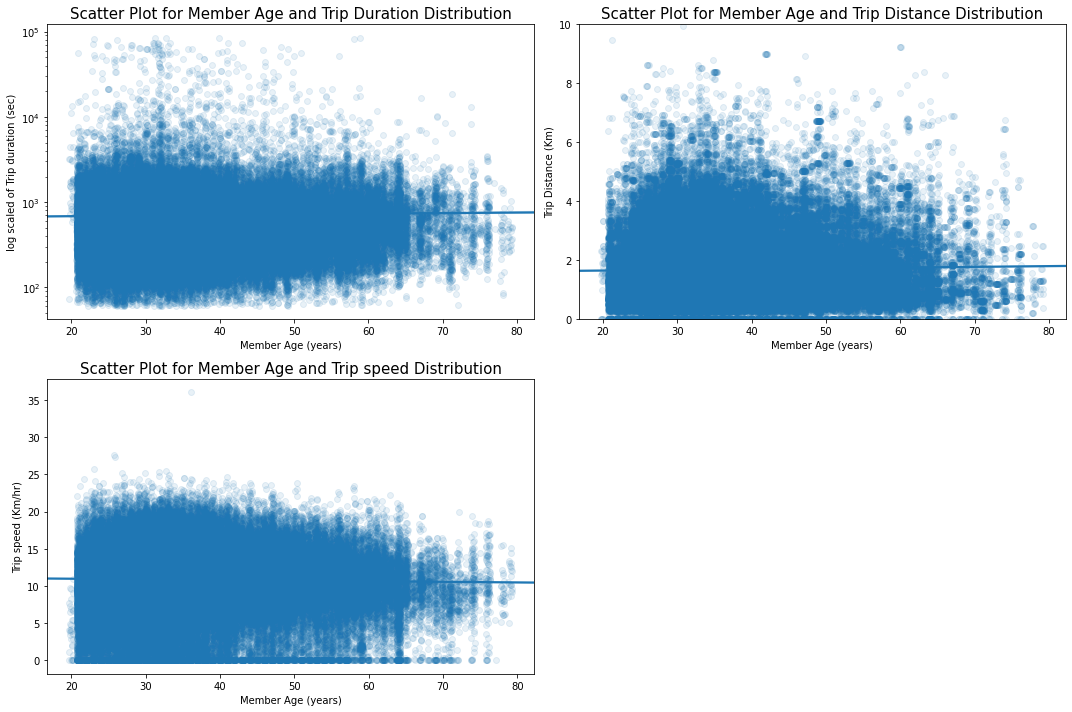

In [51]:
# Ploting the distribution of trip duration, distance and speed
# Resize figure to accommodate Three plots
plt.figure(figsize = [15, 10],tight_layout=True)

# PLOT ON top left - Scatter Plot for the member age - trip duration
plt.subplot(2, 2, 1)
ax_dur = sb.regplot(data=ford_bike,x='age',y='duration_sec',x_jitter=0.3, truncate=False, scatter_kws={'alpha':1/10});   # Scatter Plot for the member age - trip duration
ax_dur.set_yscale('log')
plt.title('Scatter Plot for Member Age and Trip Duration Distribution', fontsize=15);
plt.xlabel('Member Age (years)');
plt.ylabel('log scaled of Trip duration (sec)');

# PLOT ON top right - Scatter Plot for the member age - trip distance
plt.subplot(2, 2, 2)
sb.regplot(data=ford_bike,x='age',y='dist',x_jitter=0.3, truncate=False, scatter_kws={'alpha':1/10});   # Scatter Plot for the member age - trip duration
plt.ylim([0,10])
plt.title('Scatter Plot for Member Age and Trip Distance Distribution', fontsize=15);
plt.xlabel('Member Age (years)');
plt.ylabel('Trip Distance (Km)');


# PLOT ON bottom left - Scatter Plot for the member age - travel speed
plt.subplot(2, 2, 3)
sb.regplot(data=ford_bike,x='age',y='trip_speed',x_jitter=0.3, truncate=False, scatter_kws={'alpha':1/10});   # Scatter Plot for the member age - trip duration
plt.title('Scatter Plot for Member Age and Trip speed Distribution', fontsize=15);
plt.xlabel('Member Age (years)');
plt.ylabel('Trip speed (Km/hr)');

> - Confirmming the heat map results, The data showing No clear relation between age and trip duration, trip distance and trip speed. But as the age get lower, the frequency of travelling for longer distances with higher speed is noticable.

<h3 style="background-color:LemonChiffon; text-align:left; font-family:verdana; font-size:125%;">
    Q5. What are The most frequent days of the month with respect to user type?
</h3>

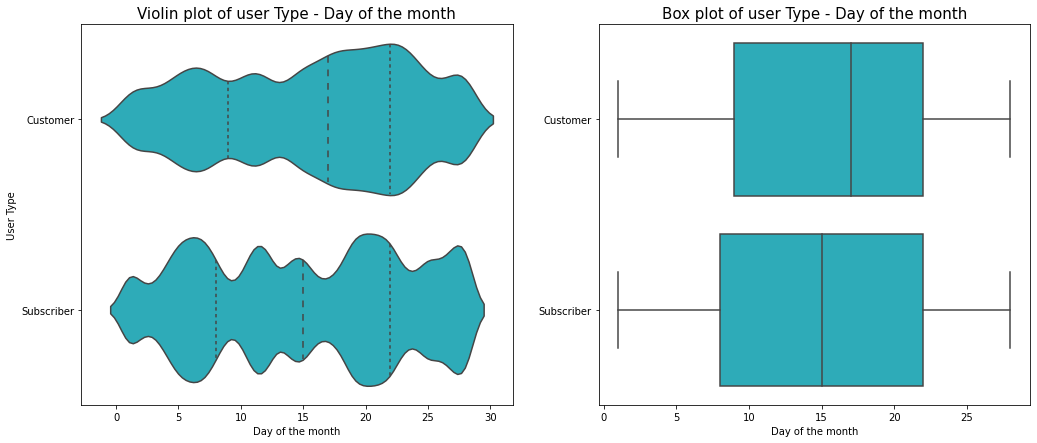

In [52]:
# Ploting the distribution of user type and day of the month
# Resize figure to accommodate Two plots
plt.figure(figsize = [17, 7])
ford_bike['start_day'] = ford_bike['start_time'].dt.day

# PLOT on left - Violin Plot for day of the month and user type
plt.subplot(1, 2, 1)
sb.violinplot(data=ford_bike, y='user_type', x='start_day', color = base_color, inner = 'quartile'); # Plot a violin for the user type & day of the month
plt.title('Violin plot of user Type - Day of the month', fontsize=15);
plt.ylabel('User Type');
plt.xlabel('Day of the month');

# PLOT on right - Box Plot for Day of month and user type
plt.subplot(1, 2, 2)
sb.boxplot(data=ford_bike, y='user_type', x='start_day', color = base_color)                        # Box Plot for the user type & day of the month
plt.title('Box plot of user Type - Day of the month', fontsize=15);
plt.ylabel('')
plt.xlabel('Day of the month');

> - Subscribers are distributed equally overall the month with some peaks  on weekly basis (suggested to be weekends).
> - Customers are increasingly have a service at the second half of the month. It may reflect a non-routine work or bi-weekly work basis pattern.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Males are the main service users.
> - as the age get lower, the frequency of travelling for longer distances with higher speed is noticable.
> - subscribers have a weekly pattern of service utilizing, while customers have a bi-weekly one.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - Yes; the day of the month and user type.

<a id='Multivariate'></a>
## Part IV - Multivariate Exploration

> Create plots of three or more variables for deep investigation of ford bike data.

<h3>In This Section, three or more features will be investigated as follows:</h3>

> Q1. What is the age distribution over member gender and user type?<br>
> Q2. What is the relation between member gender and corresponding trip distance and trip duration?<br>
> Q3. What is the relation between day of the month and average trip speed versus both member gender and user type?

<h3 style="background-color:MistyRose; text-align:left; font-family:verdana; font-size:125%;">
    Q1. What is the age distribution over member gender and user type?
</h3>

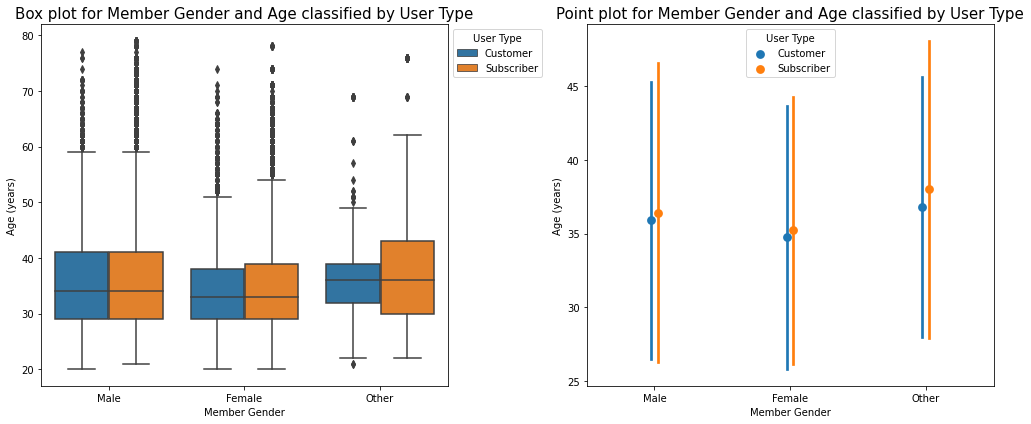

In [53]:
# Ploting the distribution of user type, member gender and age
# Resize figure to accommodate Two plots
plt.figure(figsize = [14, 6],tight_layout=True)

# PLOT on left - Box Plot for member gender and age with corresponding user type
plt.subplot(1, 2, 1)
sb.boxplot(data=ford_bike, x='member_gender', y='age', hue='user_type', order=['Male','Female','Other']);                                           # Box Plot construction
plt.title('Box plot for Member Gender and Age classified by User Type', fontsize=15);
plt.xlabel('Member Gender');
plt.ylabel('Age (years)');
plt.legend(title='User Type', bbox_to_anchor=(1, 1));                                                              # Legend title & Positioning

# PLOT on right - Point Plot for member gender and age with corresponding user type
plt.subplot(1, 2, 2)
sb.pointplot(data=ford_bike, x='member_gender', y='age', hue='user_type', order=['Male','Female','Other'], ci='sd', linestyles="", dodge=True);     # Point Plot construction
plt.title('Point plot for Member Gender and Age classified by User Type', fontsize=15);
plt.xlabel('Member Gender');
plt.ylabel('Age (years)');
plt.legend(title='User Type');                                                                                     # Legend title

> - The average age of user type is the same over each member gender.
> - The undefined users' gender has a higher average age with respect to defined users.
> - The quatile range age for Males is between 30 ~ 40 years old & between 30 ~ 38 for Females.
> - Subscribers average age is a little bit higher than Customers.

<h3 style="background-color:MistyRose; text-align:left; font-family:verdana; font-size:125%; line-height: 1.3">
    Q2. What is the relation between trip distance and trip duration with corresponding member gender and User type ?
</h3>

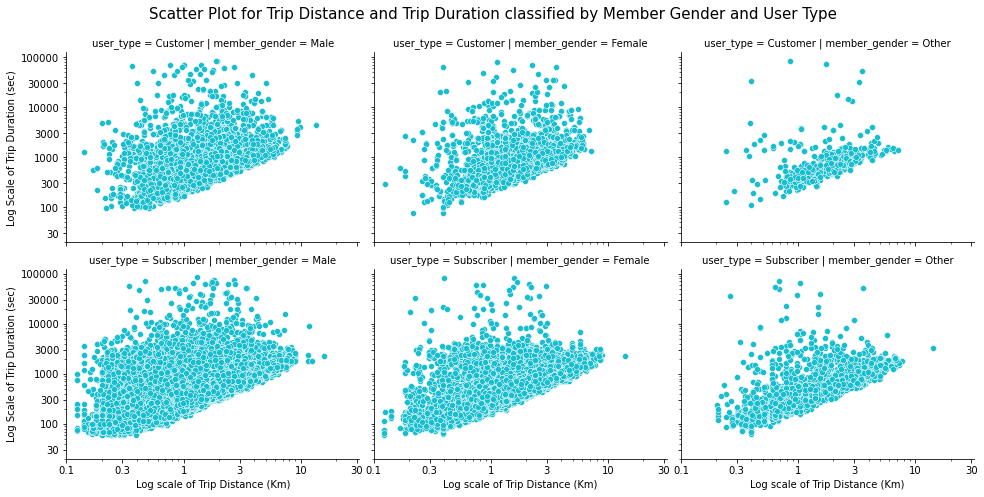

In [54]:
# Ploting the distribution of member gender and user type versus trip distance and trip duration

g = sb.FacetGrid(data = ford_bike, col = 'member_gender', col_order=['Male','Female','Other'], row = 'user_type', 
                 height=3.5, aspect=1.3)
g.map(sb.scatterplot, 'dist', 'duration_sec', color=base_color);
g.set_axis_labels('Log scale of Trip Distance (Km)', 'Log Scale of Trip Duration (sec)');
g.fig.subplots_adjust(top=0.89)                                                                                    # adjust the Figure position within facetGrid.
g.fig.suptitle('Scatter Plot for Trip Distance and Trip Duration classified by Member Gender and User Type', fontsize=15);     # Set a common Subtitle.
plt.xscale('log');
plt.yscale('log');
xtick_lock = [0.1, 0.3, 1, 3, 10, 30]
ytick_lock = [30, 100, 300, 1000, 3000, 10000, 30000, 100000]
plt.xticks(xtick_lock,xtick_lock);
plt.yticks(ytick_lock,ytick_lock);
plt.xlim(10**-1, 10** 1.5);
plt.ylim(10**1.3, 10** 5.1);

> - A linear relationships on log scales for trip distance and trip duration.
> - Exculding a higher trip duration, the customer/undefined gender relationship is quiet strong in positive direction.

<h3 style="background-color:MistyRose; text-align:left; font-family:verdana; font-size:125%; line-height: 1.3">
    Q3. What is the relation between day of the month and average trip speed versus both member gender and user type?
</h3>

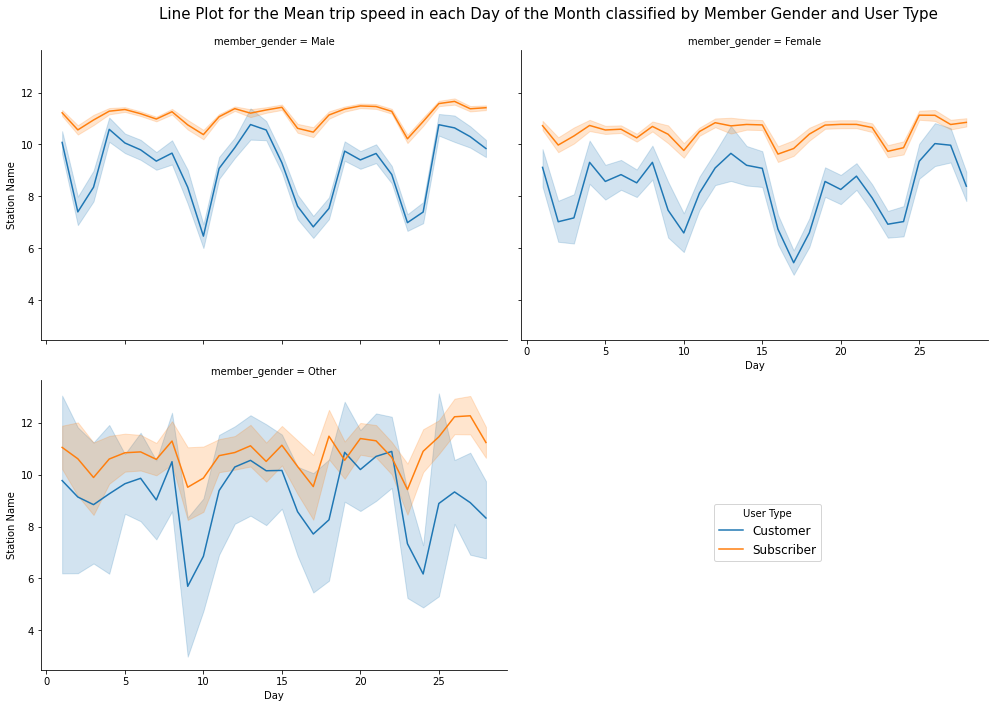

In [55]:
# Ploting the distribution of day of the month and average trip speed versus both member gender and user type

g = sb.FacetGrid(data = ford_bike, col = 'member_gender', col_order=['Male','Female','Other'], hue = 'user_type', 
                 height=5, aspect=1.4, col_wrap=2, subplot_kws={'xlabel':'Trip Distance (Km)','ylabel':'Trip Duration (sec)'})   # Construct FacetGrid
g.map(sb.lineplot, 'start_day', 'trip_speed');                                                                                   # Line Plotting
g.set_axis_labels('Day', 'Station Name');
g.fig.subplots_adjust(top=0.92)                                                                                                  # adjust the Figure position within facetGrid.
g.fig.suptitle('Line Plot for the Mean trip speed in each Day of the Month classified by Member Gender and User Type', fontsize=15);                        # Set a common Subtitle.
g.add_legend(title='User Type', bbox_to_anchor=(0.75,0.25), frameon= True, fontsize=12);

> - Generally, overall the month, The subscribers' average trip speed is higher than customers.
> - Also, The average travelling speed by Males is higher than Females.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - The undefined users' gender has a higher average age with respect to defined users.
> - Subscribers average age is a little bit higher than Customers.
> - A linear relationships on log scales for trip distance and trip duration.
> - Exculding a higher trip duration, the customer/undefined gender relationship is quiet strong in positive direction.
> - Generally, overall the month, The subscribers' average trip speed is higher than customers.
> - Also, The average travelling speed by Males is higher than Females.

### Were there any interesting or surprising interactions between features?

> Yes, of course. User Type and average speed, A linear relationships on log scale was noted for trip distance and trip duration, The mean age for each gender / customer.